In [2]:
import pandas as pd

data = {'x':[40,43,33,90,62,80,103,99,87,107,75,135,86,23,33,91,81,108,98,67,119,149,99,102,76,81,48,55,35,48,115,194,57,36,38,79,97,173,54,35,72,33,22,106,95,119,29,100,95,19,76,106,98,90,62,103,83,17,43,59,97,43,54,130,45,78,69,57,22,80,40,60,29,37,99,39,23,32,39,110,45,38,55,82,72,66,65,37,39,24,84,36,31,39,59,80,95,38,52,27]
        ,'y':[39080335,35218364,29104017,26916180,26900000,25409952,25233543,24837595,24547800,24501000,24268160,23800000,23660000,23640652,23138062,22981600,22859400,22749232,22500000,22395577,22181607,21523650,21422141,20853300,20120210,19831818,19829500,19530159,19379153,18687601,18678000,18625033,18601433,18521000,18490719,18483056,18386262,18248030,18216906,18159612,17965500,17910045,17834390,17816450,17743720,17637400,17599468,17519030,17519000,17388751,17212800,17063477,16981741,16364050,16304883,16154000,16111510,16063684,15700000,15680000,15629700,15450000,15106280,15100000,15067804,1.50E+07,14978103,14972300,14897125,14790123,14465847,14407413,14381904,14362103,14130500,13987843,13908292,13854856,13654113,13552485,13177468,13102742,13100000,12894700,12884000,12809921,12713394,12572109,12566618,12505200,12498000,12278839,12245998,12228168,12218147,12194000,12187523,12032014,11965564,11391678                    ]}

df =pd.DataFrame(data, columns=['x','y']) #x軸平均每人消費額、y軸餐廳銷售額
df

,x,y
0,40,39080335.0
1,43,35218364.0
2,33,29104017.0
3,90,26916180.0
4,62,26900000.0
...,...,...
95,80,12194000.0
96,95,12187523.0
97,38,12032014.0
98,52,11965564.0


In [3]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = cluster.KMeans(n_clusters).fit(df)

kmeans

KMeans(n_clusters=4)

In [7]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.59285714e+01 1.36343541e+07]
 [8.69047619e+01 2.40271509e+07]
 [7.56571429e+01 1.80523340e+07]
 [4.15000000e+01 3.71493495e+07]]


In [4]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


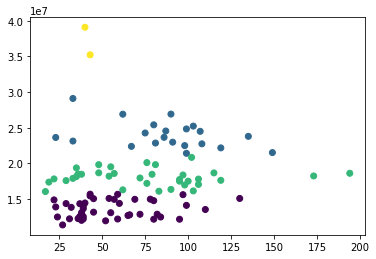

In [5]:
plt.scatter(df['x'],df['y'],c=kmeans.labels_)

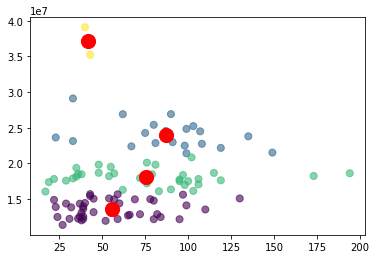

In [8]:
plt.scatter(df['x'],df['y'],c=kmeans.labels_,s=50,alpha=0.6) 

plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200) 

In [10]:
centroids[:,0] #每人消費平均點

array([55.92857143, 86.9047619 , 75.65714286, 41.5       ])

In [11]:
centroids[:,1] #餐廳銷售平均點

array([13634354.14285715, 24027150.85714286, 18052334.02857143,
       37149349.5       ])

Text(0, 0.5, 'SSE Value')

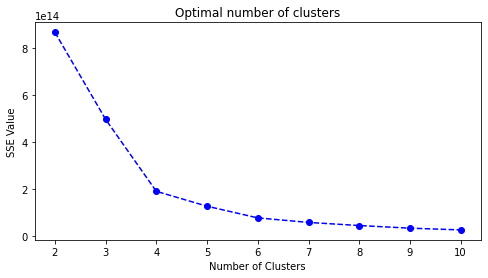

In [12]:
SSE = []

k =range(2,11)

for x in k:
    kmean_optimized =KMeans(n_clusters=x)
    kmean_optimized.fit(df)
    SSE.append(kmean_optimized.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(k, SSE, 'bo--')
plt.title('Optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE Value')
#驗證分為四群是否最佳